In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [240]:
# Data source - "https://www.kaggle.com/datasets/yasserh/titanic-dataset"

df=pd.read_csv("/content/drive/MyDrive/Internship/Titanic-Dataset.csv")

In [241]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [243]:
df.shape

(891, 12)

In [244]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [245]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [246]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [247]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [248]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [249]:
# Lets check the gender distribution of the customers.

pd.DataFrame(df.Sex.value_counts())

,Sex
male,577
female,314


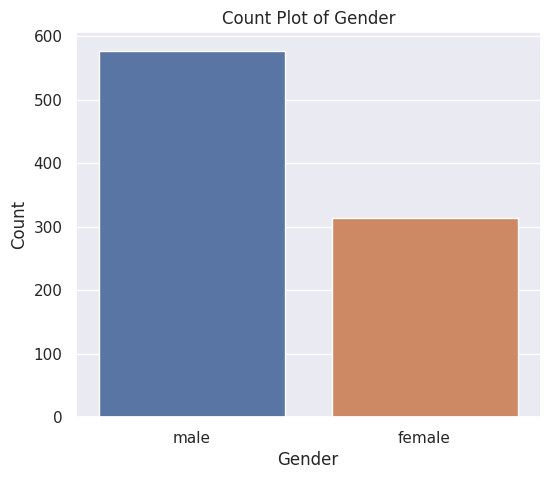

In [250]:
sns.set(style="darkgrid")
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Sex')
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [251]:
pd.DataFrame(df.Survived.value_counts())

,Survived
0,549
1,342


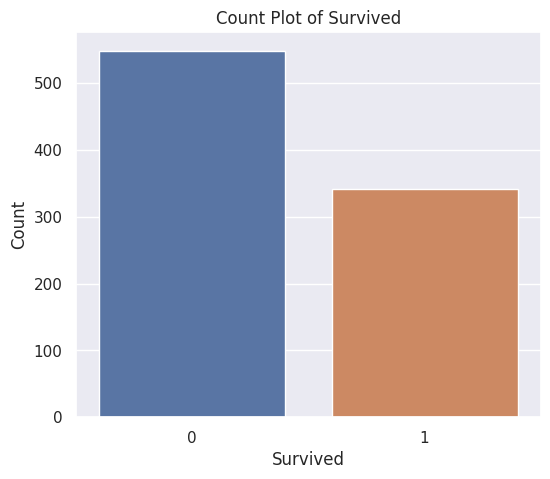

In [252]:
sns.set(style="darkgrid")
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Survived')
plt.title('Count Plot of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

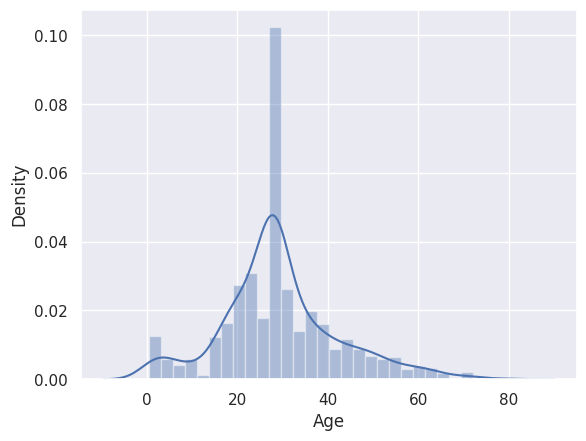

In [253]:
sns.distplot(df['Age'])
plt.show()

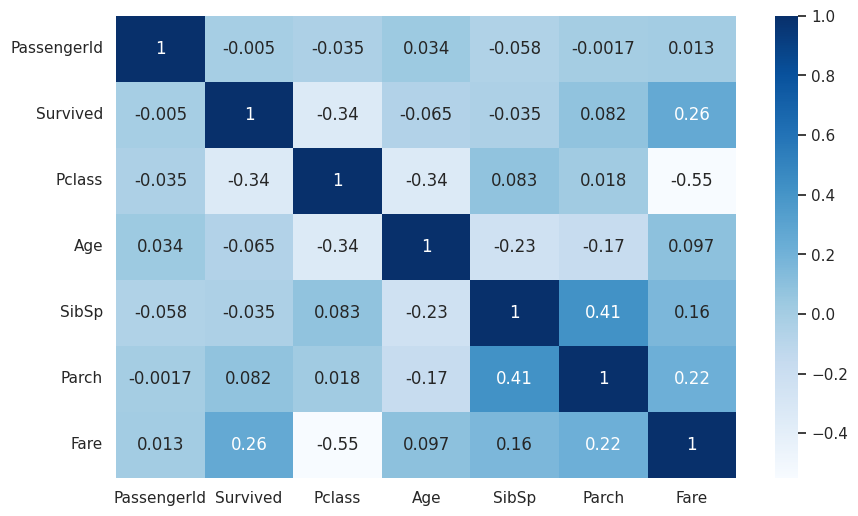

In [254]:
# Lets visualize the correlation using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [255]:
df=df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin' ])

In [256]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [259]:
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables

encode = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = encode.fit_transform(df[i].astype(str))
        df[i] = q
        df[i] = df[i].astype(int)
encoder(df)

In [260]:
# Separate independent and target variable
X = df.drop('Survived',axis=1)
y = df['Survived']


# Split the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(623, 7) (268, 7)
(623,) (268,)


In [261]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [262]:
y_pred = log_reg.predict(X_test)

In [263]:
accuracy_score(y_test,y_pred)

0.8283582089552238

In [264]:
# Compute precision, recall and F1-score

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       168
           1       0.82      0.69      0.75       100

    accuracy                           0.83       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.83      0.82       268



In [265]:
# Create the decision tree model using "entropy" method
from sklearn.tree import DecisionTreeClassifier

model_1=DecisionTreeClassifier(criterion='entropy')

In [266]:
model_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [267]:
print(model_1.score(X_train, y_train))  # performance on train data)
print(model_1.score(X_test, y_test))  # performance on test data)

0.9839486356340289
0.7798507462686567


In [268]:
# Create the decision tree model using "gini" method

model_2= DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=15, max_leaf_nodes=10)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=10, random_state=100)

In [270]:
print(model_2.score(X_train, y_train))  # performance on train data)
print(model_2.score(X_test, y_test))  # performance on test data)

0.826645264847512
0.8283582089552238


# Logistic regression and Decision tree with "gini" method is giving the same accuracy